In [1]:
!pip install xgboost lightgbm catboost scikit-learn


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns


train_data = pd.read_csv("/kaggle/input/who-life/imputed_train_data_2014.csv")
test_data = pd.read_csv("/kaggle/input/who-life/imputed_test_data_2015.csv")

# Drop missing values
train_data = train_data.dropna()
test_data = test_data.dropna()

# Convert categorical variable
train_data["Status"] = train_data["Status"].apply(lambda x: 1 if x == "Developing" else 0)
test_data["Status"] = test_data["Status"].apply(lambda x: 1 if x == "Developing" else 0)


features = [
    "Status", "Adult.Mortality", "infant.deaths", "Alcohol", "under.five.deaths",
    "Polio", "Total.expenditure", "HIV.AIDS", "GDP", "thinness..1.19.years",
    "Income.composition.of.resources"
]

X_train = train_data[features]
y_train = train_data["Life.expectancy"]

X_test = test_data[features]
y_test = test_data["Life.expectancy"]


In [3]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train model
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model.__class__.__name__}:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print("-" * 30)
    return mse, r2


In [4]:
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
evaluate_model(dt_model, X_train, X_test, y_train, y_test)


DecisionTreeRegressor:
Mean Squared Error: 6.3309
R^2 Score: 0.9035
------------------------------


(6.330903415263037, 0.9035422830488038)

In [5]:
xgb_model = XGBRegressor(random_state=42, learning_rate=0.1, n_estimators=100, max_depth=5)
evaluate_model(xgb_model, X_train, X_test, y_train, y_test)


XGBRegressor:
Mean Squared Error: 3.7733
R^2 Score: 0.9425
------------------------------


(3.7732715381596384, 0.9425103916243074)

In [6]:
lgbm_model = LGBMRegressor(random_state=42, learning_rate=0.1, n_estimators=100, max_depth=5)
evaluate_model(lgbm_model, X_train, X_test, y_train, y_test)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 422
[LightGBM] [Info] Number of data points in the train set: 183, number of used features: 11
[LightGBM] [Info] Start training from score 71.536612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

(4.397774085742927, 0.9329954636560709)

In [7]:
catboost_model = CatBoostRegressor(random_state=42, learning_rate=0.1, n_estimators=100, max_depth=5, verbose=0)
evaluate_model(catboost_model, X_train, X_test, y_train, y_test)


CatBoostRegressor:
Mean Squared Error: 3.6907
R^2 Score: 0.9438
------------------------------


(3.6906995458145535, 0.9437684594454838)

In [8]:
from sklearn.preprocessing import StandardScaler
# Scale data for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVR(kernel="rbf", C=1.0, epsilon=0.1)
evaluate_model(svm_model, X_train_scaled, X_test_scaled, y_train, y_test)


SVR:
Mean Squared Error: 12.5083
R^2 Score: 0.8094
------------------------------


(12.508308738603809, 0.8094232647843529)

In [9]:
results = []

# Evaluate each model and append results
results.append(("Decision Tree", *evaluate_model(dt_model, X_train, X_test, y_train, y_test)))
results.append(("XGBoost", *evaluate_model(xgb_model, X_train, X_test, y_train, y_test)))
results.append(("LightGBM", *evaluate_model(lgbm_model, X_train, X_test, y_train, y_test)))
results.append(("CatBoost", *evaluate_model(catboost_model, X_train, X_test, y_train, y_test)))
results.append(("SVM", *evaluate_model(svm_model, X_train_scaled, X_test_scaled, y_train, y_test)))

# Create a DataFrame for comparison
results_df = pd.DataFrame(results, columns=["Model", "MSE", "R^2"])
print(results_df)


DecisionTreeRegressor:
Mean Squared Error: 6.3309
R^2 Score: 0.9035
------------------------------
XGBRegressor:
Mean Squared Error: 3.7733
R^2 Score: 0.9425
------------------------------
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 422
[LightGBM] [Info] Number of data points in the train set: 183, number of used features: 11
[LightGBM] [Info] Start training from score 71.536612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

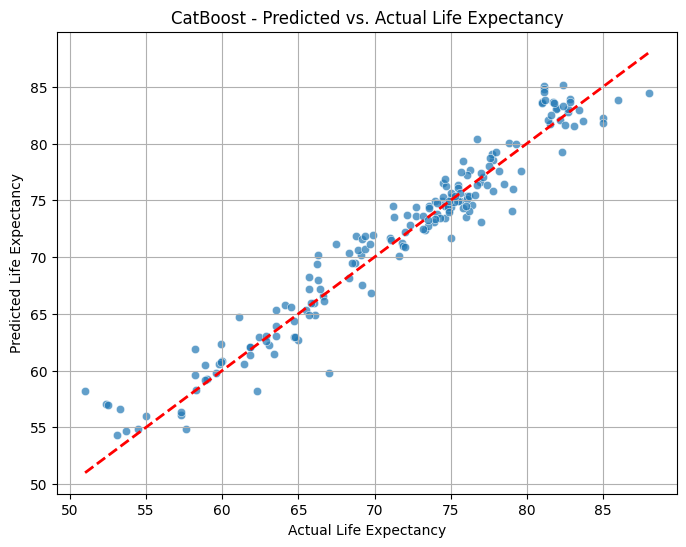

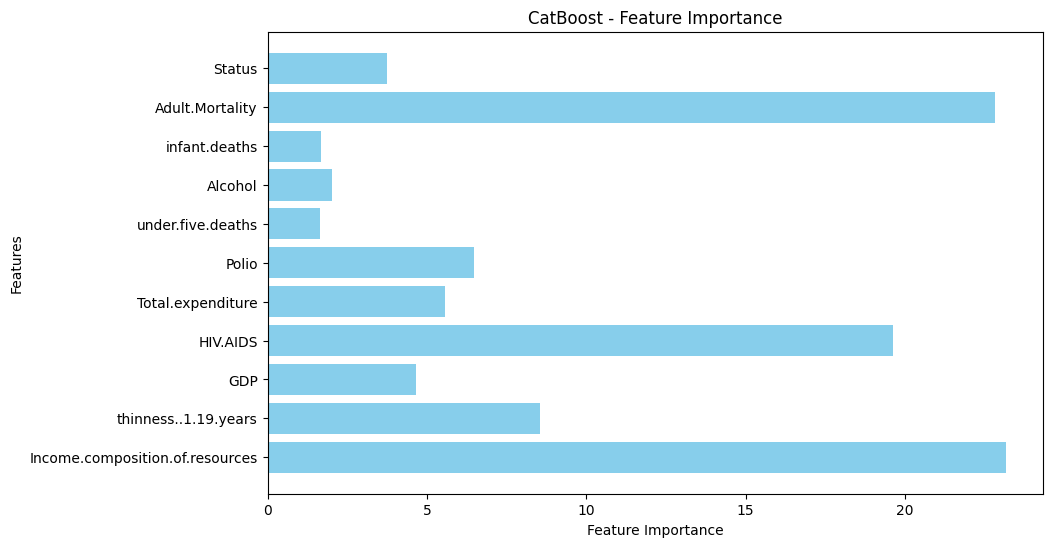

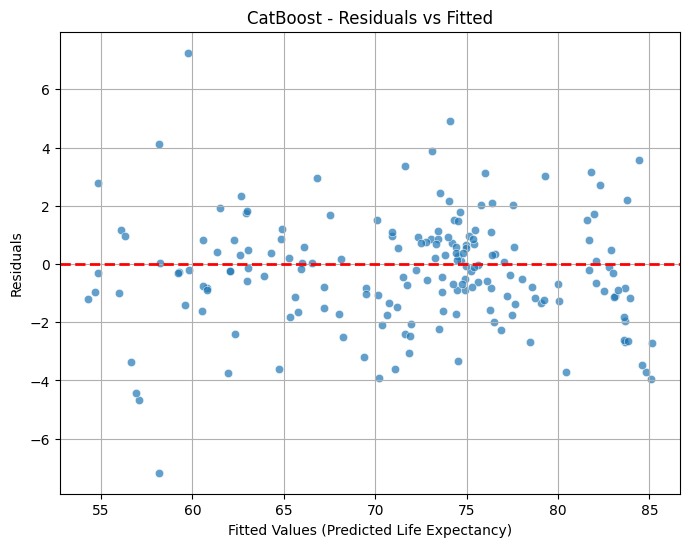

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


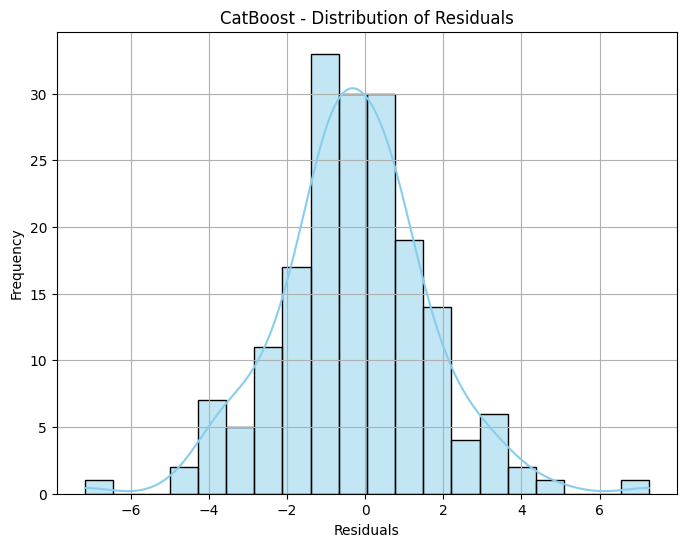

In [10]:


# Predict on the test set
catboost_y_pred = catboost_model.predict(X_test)

# Scatterplot: Predicted vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=catboost_y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("CatBoost - Predicted vs. Actual Life Expectancy")
plt.grid(True)
plt.savefig("catboost_predicted_vs_actual.png", dpi=300, bbox_inches='tight')
plt.show()



# Train the CatBoost model
catboost_model.fit(X_train, y_train)

# Get feature importance
feature_importance = catboost_model.get_feature_importance()
features = X_train.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("CatBoost - Feature Importance")
plt.gca().invert_yaxis()  
plt.savefig("catboost_feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()


# Calculate residuals
residuals = y_test - catboost_y_pred

# Residuals vs Fitted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=catboost_y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Fitted Values (Predicted Life Expectancy)")
plt.ylabel("Residuals")
plt.title("CatBoost - Residuals vs Fitted")
plt.grid(True)
plt.savefig("catboost_residuals_vs_fitted.png", dpi=300, bbox_inches='tight')
plt.show()

# Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20, color="skyblue")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("CatBoost - Distribution of Residuals")
plt.grid(True)
plt.savefig("catboost_residuals_histogram.png", dpi=300, bbox_inches='tight')
plt.show()

